# NLP (Natural Language Processing)
- Cleaning
- Processing
- Charting
## Cleaning
- NLP Stopword Removal
- Remove non-letters
## Processing
- Flat map each line of text to just a word(one to many)
  - lowercase
  - strip off whitespace
  - split it by our delimitter(, tab,)
- map
- filter
- reduce

In [0]:
import urllib.request
StringInURL = "https://raw.githubusercontent.com/denisecase/starting-spark/master/data/nod.txt"
urllib.request.urlretrieve("https://raw.githubusercontent.com/denisecase/starting-spark/master/data/nod.txt", "/tmp/nod.txt")
dbutils.fs.mv("file:/tmp/nod.txt", "dbfs:/data/nod.txt")

Out[35]: True

In [0]:
nServers = 4
nodRDD = sc.textFile("dbfs:/data/nod.txt", nServers)

In [0]:
print(type(nodRDD))

<class 'pyspark.rdd.RDD'>

In [0]:
# flatmap each line to words
inMessyWordsRDD = nodRDD.flatMap(lambda line : line.strip().split(" "))

In [0]:
# clean out punctuation 
# Filter out stopwords
# then map() to intermediate key-value pairs

# clean out punctuation
import re
cleanWordsRDD = inMessyWordsRDD.map(lambda w : re.sub( r'[^a-zA-Z]' , '' , w))

# filter out stopwords
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()

cleanWordsRDD.filter(lambda w : w not in stopwords)

IKVPairsRDD = cleanWordsRDD.map(lambda word : (word, 1))

In [0]:
# reduce by key() to word, count (word, sum)
resultsRDD  = IKVPairsRDD.reduceByKey(lambda acc, value: acc + value )

In [0]:
# collect() back into python 
results = resultsRDD.collect()

In [0]:
print(results)

[('Blynken', 7), ('', 5), ('EUGENE', 1), ('in', 6), ('of', 5), ('sea', 5), ('are', 3), ('do', 1), ('have', 2), ('silver', 1), ('And', 9), ('sped', 1), ('them', 1), ('long', 2), ('waves', 1), ('cast', 1), ('wherever', 1), ('Never', 1), ('came', 1), ('was', 2), ('seemed', 1), ('thought', 1), ('dreamed', 1), ('sailing', 1), ('name', 1), ('two', 1), ('eyes', 2), ('head', 1), ('wonderful', 1), ('sights', 1), ('and', 6), ('Nod', 7), ('BY', 1), ('off', 1), ('a', 8), ('wooden', 4), ('shoe', 5), ('Into', 1), ('Where', 2), ('you', 6), ('wish', 2), ('old', 3), ('the', 20), ('to', 2), ('beautiful', 4), ('laughed', 1), ('As', 3), ('wind', 1), ('that', 5), ('Ruffled', 1), ('little', 3), ('stars', 3), ('nets', 2), ('their', 1), ('from', 1), ('T', 1), ('sail', 1), ('be', 2), ('shall', 2), ('shut', 1), ('FIELD', 1), ('night', 3), ('Sailed', 2), ('dew', 2), ('The', 3), ('three', 4), ('fish', 3), ('That', 2), ('live', 1), ('this', 1), ('Nets', 1), ('gold', 1), ('we', 2), ('rocked', 2), ('lived', 1), ('Now', 1), ('threw', 1), ('twinkling', 1), ('Then', 1), ('down', 1), ('home', 1), ('pretty', 1), ('folks', 1), ('dream', 1), ('d', 1), ('Of', 2), ('But', 1), ('is', 1), ('sailed', 1), ('wee', 1), ('trundlebed', 1), ('sings', 1), ('things', 1), ('misty', 1), ('Wynken', 7), ('one', 1), ('on', 1), ('river', 1), ('crystal', 1), ('light', 1), ('going', 1), ('what', 1), ('moon', 2), ('asked', 1), ('We', 1), ('come', 1), ('for', 1), ('herring', 2), ('Said', 1), ('sang', 1), ('song', 1), ('they', 3), ('all', 2), ('were', 1), ('your', 2), ('afeard', 1), ('So', 2), ('cried', 1), ('fishermen', 4), ('All', 1), ('To', 1), ('foam', 1), ('skies', 2), ('Bringing', 1), ('so', 1), ('it', 2), ('if', 1), ('could', 1), ('not', 1), ('some', 1), ('t', 1), ('I', 1), ('Is', 1), ('ones', 1), ('while', 1), ('mother', 1), ('see', 1), ('rock', 1)]

In [0]:
poem = """
Wynken, Blynken, and Nod - BY EUGENE FIELD

Wynken, Blynken, and Nod one night
    Sailed off in a wooden shoe--
Sailed on a river of crystal light,
    Into a sea of dew.
"Where are you going, and what do you wish?"
    The old moon asked of the three.
"We have come to fish for the herring fish
That live in this beautiful sea;
Nets of silver and gold have we!"
                  Said Wynken,
                  Blynken,
                  And Nod.

The old moon laughed and sang a song,
    As they rocked in the wooden shoe,
And the wind that sped them all night long
    Ruffled the waves of dew.
The little stars were the herring fish
    That lived in that beautiful sea--
"Now cast your nets wherever you wish--
    Never afeard are we!"
    So cried the stars to the fishermen three:
                  Wynken,
                  Blynken,
                  And Nod.

All night long their nets they threw
   To the stars in the twinkling foam---
Then down from the skies came the wooden shoe,
   Bringing the fishermen home;
'T was all so pretty a sail it seemed
   As if it could not be,
And some folks thought 't was a dream they 'd dreamed
   Of sailing that beautiful sea---
   But I shall name you the fishermen three:
                     Wynken,
                     Blynken,
                     And Nod.

Wynken and Blynken are two little eyes,
   And Nod is a little head,
And the wooden shoe that sailed the skies
   Is a wee one's trundle-bed.
So shut your eyes while mother sings
   Of wonderful sights that be,
And you shall see the beautiful things
   As you rock in the misty sea,
   Where the old shoe rocked the fishermen three:
                     Wynken,
                     Blynken,
                     And Nod.
                     """

In [0]:
listin= [poem]
messyRDD = sc.parallelize(listin)

In [0]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', "i'll", "you'll", "he'll", "she'll", "we'll", "they'll", "i'd", "you'd", "he'd", "she'd", "we'd", "they'd", "i'm", "you're", "he's", "she's", "it's", "we're", "they're", "i've", "we've", "you've", "they've", "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "mustn't", "can't", "couldn't", 'cannot', 'could', "here's", "how's", "let's", 'ought', "that's", "there's", "what's", "when's", "where's", "who's", "why's", 'would']

In [0]:
messyWordsRDD = messyRDD.flatMap(lambda line: line.strip().split(" "))
nonStopRDD = messyWordsRDD.filter(lambda word: word not in stopwords)
nonStopRDD.collect()


Out[46]: ['Wynken,',
 'Blynken,',
 'Nod',
 '-',
 'BY',
 'EUGENE',
 'FIELD\n\nWynken,',
 'Blynken,',
 'Nod',
 'one',
 'night\n',
 '',
 '',
 '',
 'Sailed',
 'wooden',
 'shoe--\nSailed',
 'river',
 'crystal',
 'light,\n',
 '',
 '',
 '',
 'Into',
 'sea',
 'dew.\n"Where',
 'going,',
 'wish?"\n',
 '',
 '',
 '',
 'The',
 'old',
 'moon',
 'asked',
 'three.\n"We',
 'come',
 'fish',
 'herring',
 'fish\nThat',
 'live',
 'beautiful',
 'sea;\nNets',
 'silver',
 'gold',
 'we!"\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Said',
 'Wynken,\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Blynken,\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'And',
 'Nod.\n\nThe',
 'old',
 'moon',
 'laughed',
 'sang',
 'song,\n',
 '',
 '',
 '',
 'As',
 'rocked',
 'wooden',
 'shoe,\nAnd',
 'wind',
 'sped',
 'night',
 'long\n',
 '',
 '',
 '',
 'Ruffled',
 'waves',
 'dew.\nThe',
 'little',
 'stars',
 'herring',
 'fish\n',
 '',
 '',
 '',
 'That',
 'lived',
 'beautiful',
 'sea--\n"Now',
 'cast',
 'nets',
 'wherever',
 'wish--\n',
 '',
 '',
 '',
 'Never',
 'afeard',
 'we!"\n',
 '',
 '',
 '',
 'So',
 'cried',
 'stars',
 'fishermen',
 'three:\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Wynken,\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Blynken,\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'And',
 'Nod.\n\nAll',
 'night',
 'long',
 'nets',
 'threw\n',
 '',
 '',
 'To',
 'stars',
 'twinkling',
 'foam---\nThen',
 'skies',
 'came',
 'wooden',
 'shoe,\n',
 '',
 '',
 'Bringing',
 'fishermen',
 "home;\n'T",
 'pretty',
 'sail',
 'seemed\n',
 '',
 '',
 'As',
 'be,\nAnd',
 'folks',
 'thought',
 "'t",
 'dream',
 "'d",
 'dreamed\n',
 '',
 '',
 'Of',
 'sailing',
 'beautiful',
 'sea---\n',
 '',
 '',
 'But',
 'I',
 'shall',
 'name',
 'fishermen',
 'three:\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Wynken,\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Blynken,\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'And',
 'Nod.\n\nWynken',
 'Blynken',
 'two',
 'little',
 'eyes,\n',
 '',
 '',
 'And',
 'Nod',
 'little',
 'head,\nAnd',
 'wooden',
 'shoe',
 'sailed',
 'skies\n',
 '',
 '',
 'Is',
 'wee',
 "one's",
 'trundle-bed.\nSo',
 'shut',
 'eyes',
 'mother',
 'sings\n',
 '',
 '',
 'Of',
 'wonderful',
 'sights',
 'be,\nAnd',
 'shall',
 'see',
 'beautiful',
 'things\n',
 '',
 '',
 'As',
 'rock',
 'misty',
 'sea,\n',
 '',
 '',
 'Where',
 'old',
 'shoe',
 'rocked',
 'fishermen',
 'three:\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Wynken,\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Blynken,\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'And',
 'Nod.']

[('fish', 4), ('one', 1), ('two', 1), ('red', 1), ('blue', 1)]
 word count
0 fish 4
1 one 1
2 two 1
3 red 1
4 blue 1
Out[47]:

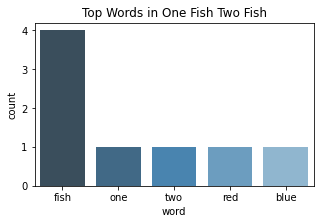

Text(0.5, 1.0, 'Top Words in One Fish Two Fish')

In [0]:
# learn how to chart results (from PySpark results of collect())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# more about numpy here https://numpy.org/
# more about pandas here https://pandas.pydata.org/ 
# more about matlotlib here https://matplotlib.org/
# more about seaborn here http://seaborn.pydata.org/
# more about collections Counter DS here https://docs.python.org/3/library/collections.html#collections.Counter

# Get a list of words
text = 'One fish two fish red fish blue fish'
# text2 = """ One fish two fish"""
word_list = text.lower().split()
# print(word_list)

# Call the Counter most_common() function to get list of tuples 
word_count_tuples_list = Counter(word_list).most_common()
print(word_count_tuples_list)

# prepare chart information
source = 'One Fish Two Fish'
title = 'Top Words in ' + source
xlabel = 'word'
ylabel = 'count'

# create Pandas dataframe from list of tuples
pd.DataFrame.from_records(word_count_tuples_list, columns = [xlabel,ylabel])
df = pd.DataFrame.from_records(word_count_tuples_list, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(5,3))
sns.barplot(xlabel, ylabel, data=df, palette="Blues_d").set_title(title)